In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Model ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

#Evaluation
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('1708069620739-boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Feature Engineering
1. Drop duplikat
2. Feature Scalling
3. Outlier Handling -> Nilai-nilai diatas, secara distribusi masih wajar sehingga tidak perlu handling outlier
* Unsupervised tidak perlu di-splitting

In [5]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {df.shape[0]}")

#membuang duplikat data
df = df.drop_duplicates().reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 506
Dataframe dimension after duplication drop 506


In [6]:
X = df.drop('medv', axis=1).values
y = df['medv'].values

In [7]:
# Feature Scalling
# ini tujuannya untuk melakukan transformasi nilai pada kolom menjadi distribusi normal (rata2 = 0, standar deviasinya = 1)
# Lakukan hanya pada kolom predictor, kolom targetnya ialah medv
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [8]:
feats = ['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']
#assign tanpa medv -> kolom target
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [9]:
new_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00


## PCA step by Step From Scratch
### Calculation the Covariance Matrix
![image.png](attachment:image.png)

In [10]:
covariance_matrix = np.cov(X_std.T)
covariance_matrix

array([[ 1.0019802 , -0.20086619,  0.40738853, -0.05600226,  0.42180532,
        -0.21968085,  0.35343273, -0.38042191,  0.62674377,  0.5839183 ,
         0.29051973, -0.38582644,  0.4565237 ],
       [-0.20086619,  1.0019802 , -0.53488527, -0.04278127, -0.51762669,
         0.31260839, -0.57066514,  0.66572388, -0.31256554, -0.31518622,
        -0.39245415,  0.17586788, -0.41381239],
       [ 0.40738853, -0.53488527,  1.0019802 ,  0.06306266,  0.76516363,
        -0.39245145,  0.6460553 , -0.70942902,  0.59630775,  0.72218743,
         0.38400646, -0.35768342,  0.60499536],
       [-0.05600226, -0.04278127,  0.06306266,  1.0019802 ,  0.09138341,
         0.09143192,  0.0866891 , -0.09937217, -0.00738283, -0.03565699,
        -0.1217558 ,  0.0488851 , -0.05403609],
       [ 0.42180532, -0.51762669,  0.76516363,  0.09138341,  1.0019802 ,
        -0.30278658,  0.73291856, -0.77075334,  0.61265134,  0.66934602,
         0.1893068 , -0.38080321,  0.59204898],
       [-0.21968085,  0.312608

## Eigendecomposition of the Covariance Matrix to get eigen value and eigen vectors

In [11]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.2509514   0.31525237 -0.24656649 -0.06177071  0.08215692  0.21965961
  -0.77760721 -0.15335048 -0.0459523  -0.26039028  0.08676107  0.10964435
  -0.01936913]
 [ 0.25631454  0.3233129  -0.29585782 -0.12871159  0.32061699  0.3233881
   0.27499628  0.40268031  0.08091897 -0.35813749 -0.07142528 -0.26275629
  -0.26752723]
 [-0.34667207 -0.11249291  0.01594592 -0.01714571 -0.00781119  0.0761379
   0.33957645 -0.17393172  0.25107654 -0.64441615 -0.11319963  0.30316943
   0.36353226]
 [-0.00504243 -0.45482914 -0.28978082 -0.81594136  0.08653094 -0.16749014
  -0.07413621  0.02466215 -0.03592171  0.01372777 -0.00398268 -0.01392667
   0.00618184]
 [-0.34285231 -0.21911553 -0.12096411  0.12822614  0.13685356  0.15298267
   0.19963484 -0.08012056 -0.04363045  0.01852201  0.80432257 -0.11131888
  -0.23105645]
 [ 0.18924257 -0.14933154 -0.59396117  0.28059184 -0.4234472  -0.05926707
  -0.06393992  0.32675226 -0.0455671  -0.04789804  0.15287286 -0.05316154
   0.43142019]
 [-0.3136

## Determining how many components and checking in each variance of eigen_value

In [12]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[47.12960635727465, 11.025193247588033, 9.558589792622946, 6.5967316008361685, 6.421661052137358, 5.056978272291284, 4.118123739654432, 3.046902418985665, 0.48853277262670386, 2.1303333054001694, 1.3023305792840114, 1.4308797464566023, 1.6941371148420041]


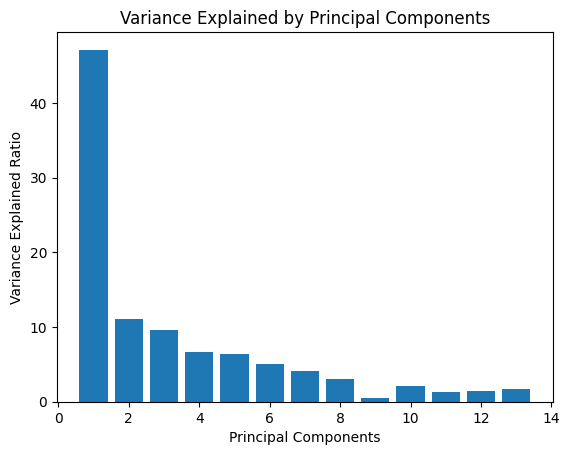

In [13]:
# Plotting for checking variance explained
plt.bar(range(1, len(variance_explained) + 1), variance_explained)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained by Principal Components')
plt.show()

In [14]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)
#10 components dari hasil dibawah ini

[ 47.12960636  58.1547996   67.7133894   74.310121    80.73178205
  85.78876032  89.90688406  92.95378648  93.44231925  95.57265256
  96.87498314  98.30586289 100.        ]


Text(0.5, 1.0, 'Explained variance vs Number of components')

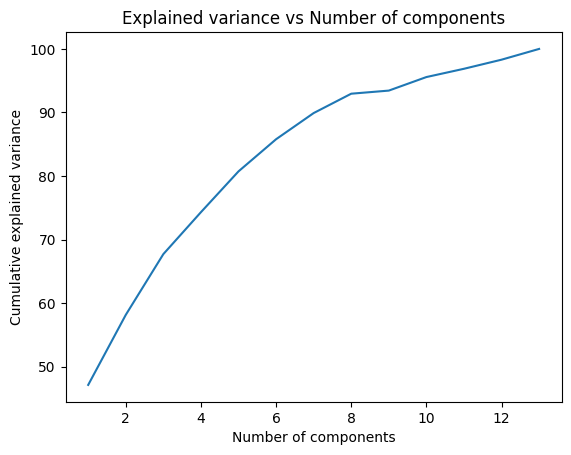

In [15]:
sns.lineplot(x = range(1,14,1), y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

## Project Data Onto Lower-Dimensional Linear Subspace
![image.png](attachment:image.png)

In [16]:
# Using ten first components (because those explain more than 95%)
projection_matrix = (eigen_vectors.T[:][:10]).T
print(projection_matrix)

[[-0.2509514   0.31525237 -0.24656649 -0.06177071  0.08215692  0.21965961
  -0.77760721 -0.15335048 -0.0459523  -0.26039028]
 [ 0.25631454  0.3233129  -0.29585782 -0.12871159  0.32061699  0.3233881
   0.27499628  0.40268031  0.08091897 -0.35813749]
 [-0.34667207 -0.11249291  0.01594592 -0.01714571 -0.00781119  0.0761379
   0.33957645 -0.17393172  0.25107654 -0.64441615]
 [-0.00504243 -0.45482914 -0.28978082 -0.81594136  0.08653094 -0.16749014
  -0.07413621  0.02466215 -0.03592171  0.01372777]
 [-0.34285231 -0.21911553 -0.12096411  0.12822614  0.13685356  0.15298267
   0.19963484 -0.08012056 -0.04363045  0.01852201]
 [ 0.18924257 -0.14933154 -0.59396117  0.28059184 -0.4234472  -0.05926707
  -0.06393992  0.32675226 -0.0455671  -0.04789804]
 [-0.3136706  -0.31197778  0.01767481  0.17520603  0.01669085  0.07170914
  -0.11601071  0.60082292  0.03855068  0.06756218]
 [ 0.32154387  0.34907     0.04973627 -0.21543585  0.09859225 -0.02343872
   0.10390044  0.12181198  0.01829854  0.15329124]
 [

In [17]:
# Getting the product of original standardized X and the eigenvectors
data_pca = X_std.dot(projection_matrix)
data_pca = pd.DataFrame(data_pca[:, :10], columns=[f'pc{i+1}' for i in range(10)])

# Add labels from the original data
data_pca['label'] = df['medv']

# Display the first few rows of the resulting DataFrame
data_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,label
0,2.098297,-0.773113,-0.342943,0.891774,0.423070,0.315338,-0.318641,-0.295832,-0.365975,0.424937,24.0
1,1.457252,-0.591985,0.695199,0.487459,-0.195876,-0.264223,-0.553861,0.223670,0.070719,0.166962,21.6
2,2.074598,-0.599639,-0.167122,0.739204,-0.934534,-0.448095,-0.484560,-0.105166,0.014022,-0.069775,34.7
3,2.611504,0.006871,0.100284,0.343721,-1.104956,-0.664649,-0.622641,-0.255941,-0.007847,0.342246,33.4
4,2.458185,-0.097712,0.075348,0.427907,-1.065924,-0.617047,-0.705086,0.134524,-0.014274,0.417668,36.2


# Regression
## Modelling menggunakan PCA dan tanpa PCA

In [18]:
#Modelling menggunakan PCA
X_new = data_pca.drop('label', axis=1)
Y_new = data_pca['label']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_new,Y_new,
                                                test_size = 0.25,
                                                random_state = 42)

model_pca = LinearRegression()
model_pca.fit(X_train_pca, Y_train_pca)

LinearRegression()

In [19]:
y_pred_pca = model_pca.predict(X_test_pca) #Model dari hasil PCA
y_pred_train_pca = model_pca.predict(X_train_pca) #Model dari hasil PCA

In [20]:
#feature scalling terlebih dahulu
#Modelling TANPA PCA
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test,Y_train,Y_test = train_test_split(X,y,
                                                test_size = 0.25,
                                                random_state = 42)

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [21]:
#prediksi model tanpa PCA
y_pred = model.predict(X_test) #Model dari hasil BUKAN PCA
y_pred_train = model.predict(X_train) #Model dari hasil BUKAN PCA

## Evaluasi

In [22]:
# RMSE : Itu makin kecil makin bagus
# RMSE : seberapa dekat nilai tebakan dengan nilai sebenarnya pada range max, min data target (medv)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Data test (Unseen) RMSE DENGAN PCA : {}'.format(np.sqrt(mean_squared_error(Y_test_pca, y_pred_pca))))
print('Data test (Unseen) RMSE TANPA PCA : {}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))

#RMSE TANPA PCA LEBIH BAGUS DARIPADA PAKAI PCA KARENA ERRORNYA 4,70 < 5.057

Data test (Unseen) RMSE DENGAN PCA : 5.057465164040512
Data test (Unseen) RMSE TANPA PCA : 4.700924890603788


In [23]:
from sklearn.metrics import r2_score
# R2 : Makin gede makin bagus (1-100 %)
# R2 : Makin gede maka makin linear Modelnya
print('Data test (Unseen) R-Square DENGAN PCA : {}'.format((r2_score(Y_test_pca, y_pred_pca))*100))
print('Data test (Unseen) R-Square TANPA PCA : {}'.format((r2_score(Y_test, y_pred))*100))

#R SQUARE TANPA PCA LEBIH BAGUS DARIPADA PAKAI PCA KARENA ERRORNYA 63.474 < 68.442

Data test (Unseen) R-Square DENGAN PCA : 63.474229347754694
Data test (Unseen) R-Square TANPA PCA : 68.44267283527097


## Dengan cara from scratch tanpa sklearn, hasilnya tetap tanpa PCA yang lebih baik. Namun nilai RMSE nya lebih kecil daripada PCA teknik dari sklearn, dan nilai R2 nya lebih besar daripada R2 yang didapat pakai teknik sklearn, untuk itu cara from scratch lebih baik daripada sklearn dalam kasus ini.